# Tellende prosjekt i ISTx1003 - 2021

I prosjektdelen av ISTx1003 Statistikk, Statistisk læring og data science, har vi fokus på tre hovedtemaer: 
regresjon, klassifikasjon og klyngeanalyse. 

Dette er oppgaveteksten til den tellende prosjektoppgaven, der besvarelsen teller 30% av karakteren i emnet.  

Veiledning av prosjektoppgaven annonseres på Blackboard.

Det må være 4-6 studenter på hver gruppe, og alle studenter må være oppmeldt i den samme emnekoden (det vil si: en av ISTA1003, ISTG1003, ISTT1003).  **Det er opprettet gruppesett under "Prosjektgrupper" på Blackboard**, der dere melder dere på innen 8. November 2021. 

Informasjon om Prosjektmodulen finnes i Blackboard, og alt kursmaterialt er her: https://wiki.math.ntnu.no/istx1003/2021h/start.  

Oppgaven skal utføres i Python, ved hjelp av Jupyter-notatbok-versjonen av denne filen som du nå leser. Notatboken er lastet opp på Jupyterhubben (todo), men kan også finnes her: https://wiki.math.ntnu.no/istx1003/2021h/start

Det er meningen at dere skal kjøre notatboken på Jupyterhubben vår https://s.ntnu.no/isthub, eller på deres egen installasjon.

Antall spørsmålspunkter per oppgave er angitt ved hver oppgave. Karakteren settes med prosentvurderingsmetoden hvor poeng blir konvertert i en prosentandel (ikke-heltall prosent blir avrundet): https://innsida.ntnu.no/wiki/-/wiki/Norsk/Prosentvurderingsmetoden

Dere kan svare på alle spørsmålene direkte her i notatboken. **!!Viktig!!**: Skriv alltid svar i feltet etter ordet <font color='red'>"Løsning":</font>, ellers blir det vanskelig for oss å rette prosjektoppgaven. 



Prosjektet leveres i Inspera, se informasjon om dette under ... på Blackboard

**Følgende skal leveres inn (lastes opp til Inspera):**

* Denne Jupyter-notatboken, der de endringene dere har gjort i koden er med.
* Jupyter-notatboken eksportert som pdf (Todo: update). Dette er bare en backup, vi vil først og fremst sjekke notatboken.

**Frist for innlevering av prosjektet til Inspera er mandag 29.november kl 09.00.**

Kontakt eksamenskontoret ved problemer. Det kan ikke gis utsettelse på innleveringsfristen.

# Oppgave 1: Regresjon (18 poeng)

Som dataingeniør vil du antakeligvis jobbe med mange forskjellige type problemstillinger og data, som for eksempel i forskning, i finanssektoren, teknologigrupper. Dette er spennende.

I dette dataeksempelet ser vi på kostnader i amerikanske sykehus mellom 1989 og 1991. Spørsmålet vi vil stille er hvilke faktorene som er avgjørende for å forutsi hvor mye sykehusoppholdet til en pasient koster. 
 

**Oppgaven inneholder følgende elementer:**

* Laste inn og utforske et datasett
* Tilpasse en enkel lineær regresjonsmodell og diskutere denne
* Tilpasse en multippel lineær regresjonsmodell og diskutere denne

## Totale kostnader for pasienter inlagt i amerikanske sykehus (1989-1991)

* `totcst`: totale kostnader 
* `age`: alder
* `dzgroup`: sykdomsgruppe (type sykdom)
* `num.co`: antall komorbiditeter (hvor mange sykdommer noen har)
* `edu`: antall år med utdanning
* `income`: inntekt (kategorisert) 
* `scoma`: et mål for Glasgow Coma indeks (grad av våkenhet)
* `meanbp`: gjennomsnittig blodtrykk
* `hrt`: puls
* `resp`: respirasjonsfrekvens
* `temp`: kroppstemperatur
* `race`: etnisitet
* `pafi`: forhold av PaO2/FiO2 (blod/gass blanding)

In [2]:
# importere pakker og funksjoner vi trenger i oppgave 1

# generelt - numerikk og nyttige funksjoner
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Fordelinger, modeller for regresjon, qq-plott 
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as  sm

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
InteractiveShell.ast_node_interactivity = "last_expr"

## Datasettet

Vi leser inn data og skriver ut de første og siste observasjonene i datasettet, og så sjekker vi datatyper. Vi konverterer noen typer til type *category* fordi det er kategoriske variabler.

In [3]:
# Lese inn datasettet ved funksjon fra pandas  (df=data frame - vanlig navn å gi et datasett)

df = pd.read_csv("https://www.math.ntnu.no/emner/IST100x/ISTx1003/support.csv", sep = ',')

# Skriv ut de første og siste radene
print(df)

        age            dzgroup  num.co   edu      income  scoma     totcst  \
0     43.54  ARF/MOSF w/Sepsis       1   NaN         NaN     26  390460.50   
1     63.66  ARF/MOSF w/Sepsis       0  22.0    $25-$50k     26  156674.13   
2     31.84          Cirrhosis       2  16.0  under $11k      0   17528.44   
3     48.70        Lung Cancer       0  16.0         NaN      0   33002.50   
4     49.61  ARF/MOSF w/Sepsis       1  12.0    $25-$50k      0  288592.25   
...     ...                ...     ...   ...         ...    ...        ...   
8137  68.62               COPD       2  12.0  under $11k      0    1847.38   
8138  66.07  ARF/MOSF w/Sepsis       1   8.0         NaN      0   34329.31   
8139  55.15               Coma       1  11.0         NaN     41   23558.50   
8140  70.38  ARF/MOSF w/Sepsis       1   NaN         NaN      0   31409.02   
8141  81.54  ARF/MOSF w/Sepsis       1   8.0    $11-$25k      0   10605.76   

       race  meanbp    hrt  resp   temp    pafi  
0     white  

In [17]:
# Konverter dzgroup, race og income til "category"

df=df.astype({'dzgroup':'category','race':'category','income':'category'})
print(df["dzgroup"].value_counts())
print(df["race"].value_counts())
print(df["income"].value_counts())

ARF/MOSF w/Sepsis    3076
CHF                  1290
COPD                  895
Lung Cancer           825
MOSF w/Malig          613
Coma                  528
Cirrhosis             458
Colon Cancer          457
Name: dzgroup, dtype: int64
white       6499
black       1178
hispanic     263
other         94
asian         71
Name: race, dtype: int64
under $11k    2571
$11-$25k      1360
$25-$50k       942
>$50k          605
Name: income, dtype: int64


In [18]:
# Få oversikt over datasettet

df.describe()

,age,num.co,edu,scoma,totcst,meanbp,hrt,resp,temp,pafi,logtotcst
count,8142.000000,8142.000000,6680.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,6042.000000,8142.000000
mean,63.020722,1.901498,11.756587,11.648858,30865.642767,84.775608,97.709862,23.525669,37.100981,240.604037,9.626087
std,15.537342,1.352183,3.429399,24.258079,45717.962369,26.725561,30.638716,9.464641,1.244434,110.482380,1.189722
min,18.120000,0.000000,0.000000,0.000000,420.310000,22.000000,0.000000,0.000000,31.700000,12.000000,6.040993
25%,53.250000,1.000000,10.000000,0.000000,5958.347500,63.000000,72.000000,18.000000,36.200000,155.022500,8.692548
50%,65.145000,2.000000,12.000000,0.000000,14484.290000,77.000000,100.000000,24.000000,36.700000,225.220000,9.580820
75%,74.400000,3.000000,14.000000,9.000000,36146.585000,107.000000,120.000000,28.000000,38.090000,306.630000,10.495338
max,101.850000,9.000000,31.000000,100.000000,633212.000000,195.000000,300.000000,90.000000,41.700000,890.380000,13.358561


In [19]:
# Sjekk datatyper for alle variabler 

df.dtypes

age           float64
dzgroup      category
num.co          int64
edu           float64
income       category
scoma           int64
totcst        float64
race         category
meanbp          int64
hrt           float64
resp            int64
temp          float64
pafi          float64
logtotcst     float64
dtype: object

Her ser vi at de fleste variablene er kontinuerlig eller heltall (int), mens dzgroup, income og race er kategoriske. Disse variablene må vi kode om med såkalt dummy-variabelkoding for at de skal bli behandlet riktig i regresjonsanalysen, men først ser vi på en enkel linear regresjon:

## Enkel lineær  regresjon 

Vi skal starte med å se på de totale kostnader `totcst` som responsen vi ønsker å undersøke/forklare, og vi velger variablen `age` (alder) som eneste forklaringsvariabel. Følgende er et kryssplott av `totcst` mot `age`:

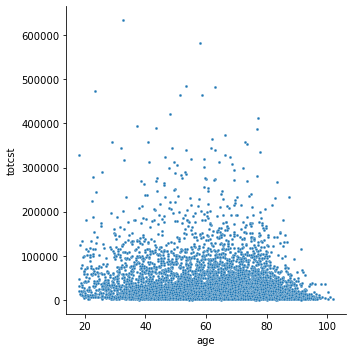

In [20]:
sns.relplot(x = 'age', y = 'totcst', kind = 'scatter', s=8, data = df)
plt.show()

### **Problem 1a)** (1P) 
Vil du konkludere med at en lineær regressjonsmodell passer bra? Hvorfor (ikke)? Maks 2 setninger.

###   <font color='red'>Løsning:</font>

I dette tilfelle er det lurt å transformere én eller flere variabler. Som statistiker vet vi at en logaritmisk transformasjon ofte hjelper. Vi tar log av responsen og ser på kryssplottet igjen:

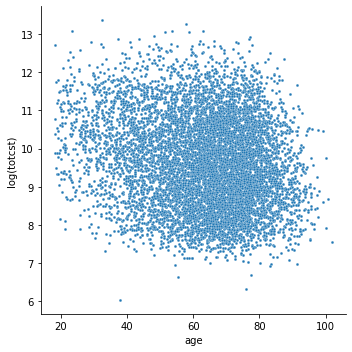

In [21]:
# Vi lager en ny variabel som er log(totcst):
df['logtotcst'] = np.log(df['totcst'])
sns.relplot(x = 'age', y = 'logtotcst', kind = 'scatter', s=8, data = df)
plt.ylabel("log(totcst)")
plt.xlabel("age")

plt.show()

### **Problem 1b)** (1P) 
Sammenlign den nye grafen (med log(totcost) som respons) med den gamle grafen lengre opp. Passer en lineær regresjonsmodell bedre nå? Maks 2 setninger.

###   <font color='red'>Løsning:</font>

Uavhengig av hva du svarte under b) skal vi nå tilpasse en enkel lineær modell med `logtotcst` som respons og `age` som forklaringsvariabel. For å oppsummere det vi har snakket om i undervisningen, så består en (enkel og multippel) lineær regresjonsanalyse av følgende steg:
    
* Steg 1: Bli kjent med dataene ved å se på oppsummeringsmål og ulike typer plott
* Steg 2: Spesifiser en matematisk modell (med modellformel)
* Steg 3: Initialiser og tilpass modellen
* Steg 4: Presenter resultater fra den tilpassede modellen 
* Steg 5: Evaluer om modellen passer til dataene

Vi har nå gjort Steg 1, og under finner du kode for å gjøre steg 2-4. Studer og kjør koden.

In [22]:
# kodechunk Steg2-4

# Steg 2: spesifiser matematisk modell
formel='logtotcst ~ age'

# Steg 3: Initaliser og tilpass en enkel lineær regresjonsmodell
# først initialisere
modell = smf.ols(formel,data=df)
# deretter tilpasse
resultat = modell.fit()

# Steg 4: Presenter resultater fra den tilpassede regresjonsmodellen
print(resultat.summary())

                            OLS Regression Results                            
Dep. Variable:              logtotcst   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     273.6
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           1.83e-60
Time:                        09:22:23   Log-Likelihood:                -12832.
No. Observations:                8142   AIC:                         2.567e+04
Df Residuals:                    8140   BIC:                         2.568e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4962      0.054    193.713      0.0

Nå skal vi studere resultatene fra `resultat.summary()`, og vi refererer til *øvre panel* som linjene mellom første og andre doble strek ==== (dette er delen som starter med Dep.Variable), *midtre panel*, og *nedre panel* (som starter med Omnibus). 

### **Problem 1c)** (3P) 

   (i) Skriv ned ligningen for den estimerte regresjonsmodellen (se midtre panel).

   (ii) Hvordan vil du tolke den estimerte verdien til skjæringpunktet (Intercept) $\hat{\beta}_0$?
   
   (iii) Se på det øvre panelet og rapporter $R^2_{adj}$ og gi en tolking av verdien (er den stor/liten, hva betyr det her?). 
   
   
###   <font color='red'>Løsning:</font>
   
   
 

 Vi kan nå også plotte den estimerte regresjonslinjen i kryssplott. 

<AxesSubplot:xlabel='age', ylabel='logtotcst'>

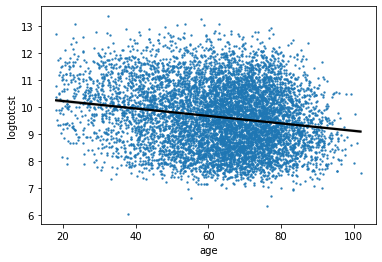

In [25]:
sns.regplot(x=df['age'],y=df['logtotcst'],line_kws={"color": "black"},scatter_kws={"s":2})

### **Problem 1d)** (3P)

 (i) Vi ser at for `age` er `coef` lik -0.0138 (dette er $\hat\beta_1$). Forklar dette tallet til en sykehusansatt som ikke har hørt om enkel lineær regresjon. Maks 2 setninger.

 (ii) Oppgi 95% konfidensintervall for $\hat\beta_{1}$? Forklar hva det betyr til din kollega som jobber på sykehuset med maks 2 setninger.

 (iii) Hva er $p$-verdien for $\hat\beta_{1}$? Forklar om vi kan være sikker på at alderen har linear sammenhang med `logtotcost`. Hvorfor (ikke)? 


###   <font color='red'>Løsning:</font>



En viktig steg når vi tilpasser en modell er å sjekke om modellen faktisk passer, ellers kan vi ende med feil konklusjoner!

For å sjekke modellantakelser ser vi på folgende plot:

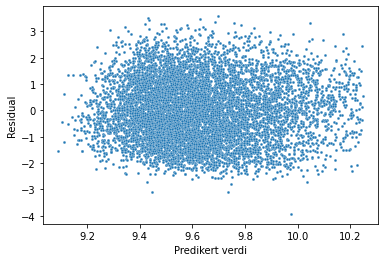

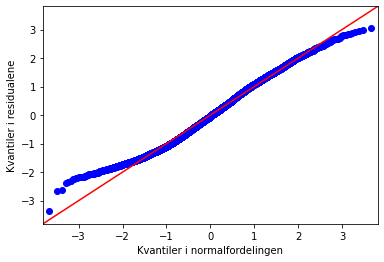

In [27]:
# kodechunk Steg5

# Steg 5: Evaluer om modellen passer til dataene
# Plotte predikert verdi mot residual 
sns.scatterplot(x=resultat.fittedvalues, y=resultat.resid,s=8)
plt.ylabel("Residual")
plt.xlabel("Predikert verdi")
plt.show()

# Lage kvantil-kvantil-plott for residualene
sm.qqplot(resultat.resid,line='45',fit=True)
plt.ylabel("Kvantiler i residualene")
plt.xlabel("Kvantiler i normalfordelingen")
plt.show()

### **Problem 1e)** (4P)

(i) (1P) Studer plottet av predikert verdi mot residual (Tukey-Anscombe (TA) plot). Vurderer du at modellantagelsene er oppfylt? Gi en kort begrunnelse (2 setninger).

(ii) (1P) Studer QQ-plottet av residualene. Hvordan vil du evaluere plottet?

(iii) (2P) Generer de samme to plottene når vi bruker `totcst` uten log-transformasjon `formel='totcst ~ age'` i en enkel linear regresjon (kopier python koden fra steg 1-5 og se på TA- og QQ-plott). Er modellantakelsene oppfylt for denne regresjonen? Forklar.

###   <font color='red'>Løsning:</font>

## Multippel lineær regresjon

For å bedre forutsi de totale kostnadene for en pasjent er det lurt å ta med flere forklaringsvariabler inn i regresjonsanalysen.

En rekke plott vises nå. Vi ser kryssplott, tetthetsplott (som er en glattet versjon av histogram) og boksplott. For tetthetsplottene og boksplottene deler vi data inn i de forskjellige sykdomgruppene for å se om sykdomtype påviker effekten som alder og num.co har på kostnadene (logtotcst).

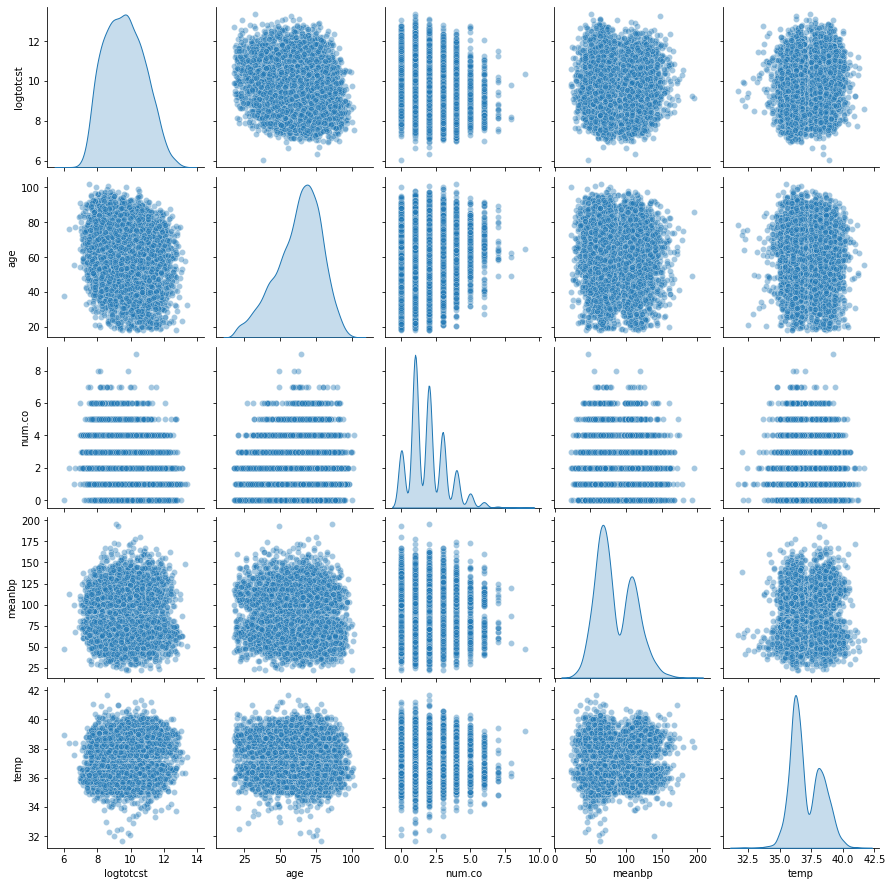

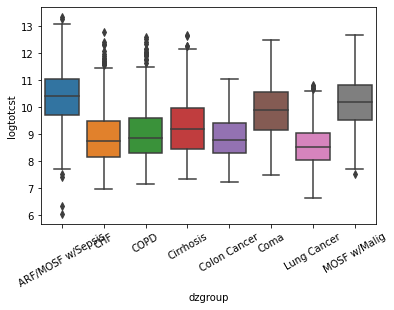

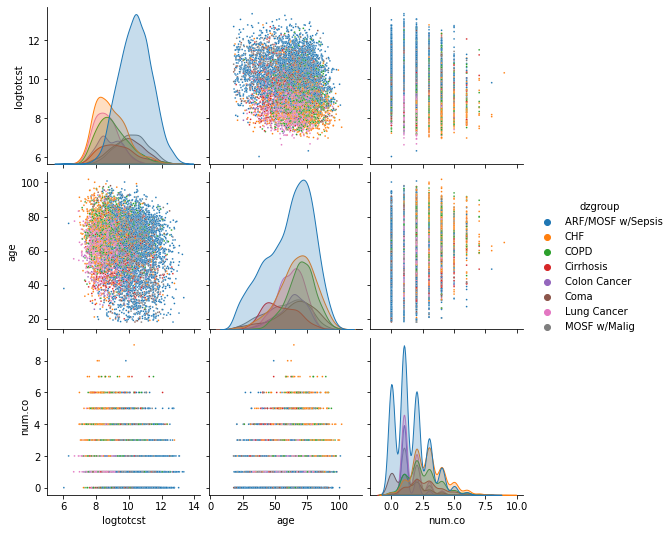

In [31]:
# Kryssplott av logtotcst mot age, num.co, meanbp og temp
# På diagonalen er glattede histogrammer (tetthetsplott) av  logtotcst, age, num.co, meanbp og temp
sns.pairplot(data=df, vars = ['logtotcst','age','num.co','meanbp','temp'],
             diag_kind = 'kde',
             plot_kws=dict(alpha=0.4))
plt.show()

# Boksplott av Blodceller for hvert Kjoenn og for hver Sport

ax = sns.boxplot(x="dzgroup", y="logtotcst", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

plt.show()

sns.pairplot(df, vars = ['logtotcst','age','num.co'],
             hue = 'dzgroup', 
             diag_kind = 'kde',
             plot_kws={"s":3})
plt.show()

Vi skal nå tilpasse en multippel lineær regresjon med (igjen) `logtotcst` som respons. Vi tar med forklaringsvariablene `age`, `num.co`, `meanbp`, `temp` og `dzgroup`. 

 
### **Problem 1f)** (4P)

Utfør regresjonen på nytt med den nye modellformelen (som er gitt under) ved å kopiere inn akkurat samme kode for steg 3, 4 og 5. 

(i) Skriv ned ligningen for den estimerte regresjonsmodellen. 

(ii) Hvor mange regresjonsparametere er estimert? 

(iii) Hvis vi sammenligner en person som er innlagt med Lung Cancer med en person med COPD (lungesykdommen kols), som begge er like gamle, har samme antall comorbiditeter (`num.co`), samme gjennomsnittig blodtrykk (`meanbp`) og samme kroppstemperatur, hvilken pasient har de høyeste forventede kostnadene?

(iv) Hva er de predikerte kostnadene på den originale skalaen (altså `totcst`, ikke `logtotcst`!) for en pasient på 50 år med Colon Cancer, en comorbiditet (num.co=1), meanbp=130 og temp=36.2? Regn for hånd ved å sette inn tall fra resultat.summary().


###   <font color='red'>Løsning:</font>



In [26]:
formel='logtotcst ~ age + dzgroup + num.co  +  meanbp + temp'

# kopier inn akkurat samme kode som i steg 3, 4 og 5

### **Problem 1g)** (2P)

(i) Forklaringsvariablen `dzgroup` er kategorisk og vi har brukt en såkalt dummy-variabelkoding, der 'ARF/MOSF w/Sepsis' er referansekategorien. Er effekten av de andre sykdomgruppene på `logtotcst` forskjellig fra effekten for referansekategorien? Forklar. 

(ii) Hva er andel forklart variasjon? Sammenlign med verdien du fant i Problem 1c(iii). Var det en god idé å bruke multippel lineær regresjon, eller var enkel linear regresjon godt nok?


###   <font color='red'>Løsning:</font>

# Oppgave 2: Klassifikasjon (15 poeng)
## Del 1: Logistisk regresjon

Et populært eksempel i klassifikasjon er implementasjonen av et spam filter. Det er noe vi alle er kjent med, men har du noen gang spurt deg selv hvordan det egentlig fungerer?

Her bruker vi en datasett med 5575 SMS meldinger som allerede har blitt klassifisert som "spam" eller "ham". Dataene er tatt fra: 

https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

og den originale studien finner du her: https://dl.acm.org/doi/10.1145/2034691.2034742

Dette er til informasjon. Du trenger ikke laste noe ned eller lese dette, du får alt du trenger her i oppgaveteksten.

I denne oppgaven skal vi tilpasse en logistisk regresjonsmodell for å lage et spam filter. 


In [32]:
# Vi begynner igjen med å importere pakker og funksjoner vi trenger i oppgaven

import pandas as pd
import numpy as np
import random

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


from sklearn.model_selection import train_test_split, cross_val_score

# plotting
import matplotlib.pyplot as plt

## Spamfilter datasett

Først leser vi inn datasettet. Vi gir nye navn til kolonnene (som skal hete 'y' og 'tekst'), koder om 'spam' til '1' og 'ham' til '0', og ser på innholdet av datasettet.


In [33]:
# Lese inn datasettet ved funksjon fra pandas  (df=data frame - vanlig navn å gi et datasett)
df = pd.read_csv('https://www.math.ntnu.no/emner/IST100x/ISTx1003/SMSSpamCollection.txt', delimiter='\t',header=None)

# Gi nye navner til den første kolonnen (slik at den heter 'y') og den andre kolonnen (som skal hete 'text').
# y er den binære responsen som koder y=1 for "spam" og y = 0 for "ham" (=ikke spam) 
# Kolonnen 'text' inneholder SMS teksten 

df = df.rename(columns={0: 'y', 1: 'text'})

# Vi bytter at spam er 1 og ham er 0
df.replace(('spam', 'ham'), (1, 0), inplace=True)

print(df)

      y                                               text
0     0  Go until jurong point, crazy.. Available only ...
1     0                      Ok lar... Joking wif u oni...
2     1  Free entry in 2 a wkly comp to win FA Cup fina...
3     0  U dun say so early hor... U c already then say...
4     0  Nah I don't think he goes to usf, he lives aro...
...  ..                                                ...
5567  1  This is the 2nd time we have tried 2 contact u...
5568  0               Will ü b going to esplanade fr home?
5569  0  Pity, * was in mood for that. So...any other s...
5570  0  The guy did some bitching but I acted like i'd...
5571  0                         Rofl. Its true to its name

[5572 rows x 2 columns]


### **Problem 2a)** (2P)

 (i) Hvor mange av SMS meldingene er spam og hvor mange er ham? Tips: Bruk en funksjon du har sett i oppgave 1 som heter `value_counts()`. 
 
 (ii) Lag et histogram for responsen $y$ ved bruk av `plt.hist()` funksjonen.

###   <font color='red'>Løsning:</font>

### Trening, validerings og testsett

Før vi fortsetter med modellering skal vi dele datasettet i tre deler: et trenings-, validerings- og et testsett. Her bestemmer vi oss for at 70% av data er i treningssettet, og 15% er i validerings og 15% i testsettet.

In [35]:
# Først del dataene i trenings og testsett (70-30%)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['text'],df['y'],test_size=0.3,random_state=10)

# Og så del testsettet igjen i et test- og et valideringssett slik at begge inneholder 15% (50% av de 30%)
X_test_raw, X_val_raw, y_test, y_val = train_test_split(X_test_raw,y_test,test_size=0.5,random_state=10)

Husk hvorfor vi må dele datasettet i disse ulike delene. Sjekk forelesningsmaterial hvis du har glemt det.


## Logistisk regresjon


I undervisningen har vi lært at logistisk regresjon trenger forklaringsvariabler. Med to forklaringsvariabler $x_1$ og $x_2$, for eksempel, kan vi modellere sannsynligheten for en "suksess" (e.g., at en SMS melding er spam) som
$$p_i = \frac{\exp(\beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i})}{ 1 + \exp(\beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i})} \ .$$



### **Problem 2b)** (1P)

I dette eksempelet har vi en datasett med 'text' som mulige forklaringsvariable. Er dette et problem? Forklar med maks 2 setninger.

###   <font color='red'>Løsning:</font>


For å hjelpe Python med å jobbe med tekstmeldingene, må vi _vektorisere_ dataene. Hva betyr det? Vel, det vil si at vi samler hvert ord og frekvensen til ordet i hver SMS. Vi oppretter en matrise hvor hver kolonne representerer et ord, og så skriver vi "1" i matrisen hvis ordet finnes i SMS meldingen som står i den respektive raden (eller "2" hvis ordet finnes dobbelt osv), ellers skriver vi "0". Vektoriseringen vil derfor produsere en matrise med gaaaanske mange 0-er (det er mange forskjellig ord, og de aller fleste ikke forekommer i en gitt SMS tekst), og derfor kan vi komprimere matrisen ganske mye. 

Alt det kan vi gjøre med bruk av følgende kode:

In [37]:
# Vektorisering av SMS tekstene
vect = CountVectorizer()
vect.fit(X_train_raw)
x_train = vect.transform(X_train_raw)
x_test = vect.transform(X_test_raw)
x_val = vect.transform(X_val_raw)

In [38]:
# Hva betyr dette? x_train, x_test og x_val er nå komprimerte matriser, 
# hvor hver rad er en SMS og hver kolonne er et ord som finnes i de ulike SMS meldingene. 

# Dette er komprimerte matriser, og derfor er det litt vanskelig å se på dem.
# Men vi kan prøve å se litt på en dekomprimert versjon av x_train her:
# (Obs! Men vi skal fortsette med de komprimerte versjonene x_train, x_test, x_val etterpå)
type(x_train)
print(pd.DataFrame(x_train.toarray()))

      0     1     2     3     4     5     6     7     8     9     ...  7176  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
1        0     0     0     0     0     0     0     0     0     0  ...     0   
2        0     0     0     0     0     0     0     0     0     0  ...     0   
3        0     0     0     0     0     0     0     0     0     0  ...     0   
4        0     0     0     0     0     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
3895     0     0     0     0     0     0     0     0     0     0  ...     0   
3896     0     0     0     0     0     0     0     0     0     0  ...     0   
3897     0     0     0     0     0     0     0     0     0     0  ...     0   
3898     0     0     0     0     0     0     0     0     0     0  ...     0   
3899     0     0     0     0     0     0     0     0     0     0  ...     0   

      7177  7178  7179  7180  7181  7182  7183  718

### Problem 2c) (1P)

Hvor mange SMS-meldinger er det i treningsdatasettet? Hvor mange forskjellige ord finnes i disse meldingene?

###   <font color='red'>Løsning:</font>


Okei... nå har vi egentlig et problem, fordi vi har flere forklaringsvariabler (flere forskjellige ord!) enn observasjoner. Vi har ikke snakket om hvordan vi må bruke logistisk regresjon i en slikt tilfelle, så dere trenger ikke å forstå hvordan det fungerer og hva som akkurat skjer når vi tilpasser en logistisk regresjonsmodell (vi bruker noe som kalles _regularisering_, men som sagt er det utenfor pensum). 

Det som er viktig er at vi gjør en logistisk regresjon med binær respons y = 0 for "ham" og y=1 for "spam". Det gjør vi nå for treningsdatasettet:

In [40]:
# Tilpass en logistisk regression med treningsdata:

lr = LogisticRegression(penalty='l2')
lr.fit(x_train,y_train)

LogisticRegression()

In [41]:
## Og nå kan vi regne ut feilrate på treningssettet:

lrscore = lr.score(x_train,y_train)
print('Logistic regression feilrate: ',1-lrscore)

Logistic regression feilrate:  0.002307692307692344


### Problem 2d) (3P)

 (i) Hvor stor er andelen av SMS-meldingene som er riktig klassifisert i treningssettet?
 
 (ii) Hvor stor er andelen av SMS-meldingene som er riktig klassifisert i valideringssettet? For å finne dette ut, kopier koden på toppen og erstatt trenings- med valideringssettet. Viktig: Bruk modellen som du har tilpasset til treningssettet!
 
 (iii) Hvorfor er det forventet at valideringssettet har en større feilrate enn treningssettet?

###   <font color='red'>Løsning:</font>

Vi har lært i undervisningen at logistisk regresjon predikerer sannsynligheten $p_i$ for at $y_i=1$. Klassifiseringsregelen som brukes er å forutsi $\hat{y}_i = 1$ hvis $p_i>0.5$ og ellers $y_i = 0$. Det er akkurat det som scorefunksjonen som brukes ovenfor (`lr.score`) faktisk gjør. Valget av 0.5 er imidlertid vilkårlig, og det kan være at en annen cutoff ville gi bedre prediksjoner.

### Problem 2e) (3P)

 (i) Bruk igjen modellen over som du har tilpasset til treningsdatasettet, men bruk alle cutoff-verdier 0.1, 0.2, ... 0.9 for å klassifisere observasjonene i valideringssettet (se kode under). Hvilken cutoff fungerer best?
 
 (ii) Nå kan du bruke den beste cutoff-verdien og regne ut feilraten på testsettet. Tilpass koden.
 
 (iii) Hvorfor er det ikke rart at vi på testsettet har en litt høyere feilrate enn på både trenings og testsettet? Maks 2 setninger.
 
###   <font color='red'>Løsning:</font>

In [72]:
# For å få sannsynlighet P(y=1) for at en SMS var spam
val_prob = lr.predict_proba(X=x_val)[:,[1]]

# Og nå klassifiser med forskjellige cutoff verdier mellom 0.1 og 0.9:
for x in np.arange(0.1, 0.9, 0.1):
    cutoff = x
    # Prediker spam eller ham avhengig av P(y=1)
    y_valpred = np.where(val_prob > cutoff, 1, 0)

    # Finn andel korrekte klassifikasjoner
    print("cutoff:", round(x,1), "Accuracy:", accuracy_score(y_true=y_val, y_pred=y_valpred),
      "Feilrate:", 1-accuracy_score(y_true=y_val, y_pred=y_valpred))

cutoff: 0.1 Accuracy: 0.9772727272727273 Feilrate: 0.022727272727272707
cutoff: 0.2 Accuracy: 0.9832535885167464 Feilrate: 0.01674641148325362
cutoff: 0.3 Accuracy: 0.9820574162679426 Feilrate: 0.01794258373205737
cutoff: 0.4 Accuracy: 0.9784688995215312 Feilrate: 0.021531100478468845
cutoff: 0.5 Accuracy: 0.9784688995215312 Feilrate: 0.021531100478468845
cutoff: 0.6 Accuracy: 0.9772727272727273 Feilrate: 0.022727272727272707
cutoff: 0.7 Accuracy: 0.9772727272727273 Feilrate: 0.022727272727272707
cutoff: 0.8 Accuracy: 0.9700956937799043 Feilrate: 0.029904306220095656


## Del 2: $k$-nærmeste-nabo-klassifikasjon (KNN)

Spamfiltereksempelet dessverre ikke brukes for KNN klassifikasjon. Problemet er noe som heter "curse of dimensionality" og det vises når det er for mange forklaringsvariabler (se her: https://en.wikipedia.org/wiki/Curse_of_dimensionality).

Vi skal derfor bruke et annet dataset hvor vi vil predikere om en person kjøper en campingvognforsikring eller ikke, avhengig av 85 forklaringsvariabler. Datasettet med 5822 observasjoner er en del av ISLR R-packagen, og mer informasjon finner du her: https://liacs.leidenuniv.nl/~puttenpwhvander/library/cc2000/data.html. 

Forsikringsselskapet vil bruke prediksjonsmodellen til å velge ut noen potensielle kunder som de kan ringe, slik at at får solgt mulige forsikringer uten å ringe for mange personer.


In [53]:
# Vi begynner igjen med å importere pakker og funksjoner vi trenger i oppgaven

import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Trening og testsett, evaluering av klassifikasjonsmetoder 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

## Caravan datasettet

In [54]:
df = pd.read_csv('https://www.math.ntnu.no/emner/IST100x/ISTx1003/Caravan.csv', delimiter=',')

df.shape
df.describe

<bound method NDFrame.describe of        MOSTYPE  MAANTHUI   MGEMOMV  MGEMLEEF  MOSHOOFD    MGODRK    MGODPR  \
0     0.680848 -0.272557  0.406662 -1.216859  0.779338 -0.694251  0.217425   
1     0.992212 -0.272557 -0.859426 -1.216859  0.779338  0.302526 -0.365379   
2     0.992212 -0.272557 -0.859426 -1.216859  0.779338 -0.694251 -0.365379   
3    -1.187335 -0.272557  0.406662  0.010754 -0.970896  1.299302 -0.948183   
4     1.225735 -0.272557  1.672750 -1.216859  1.479432  0.302526 -0.365379   
...        ...       ...       ...       ...       ...       ...       ...   
5817  0.914371 -0.272557 -2.125514 -1.216859  0.779338 -0.694251  0.800229   
5818  0.836530 -0.272557  1.672750  1.238367  0.779338  0.302526 -0.365379   
5819  0.680848 -0.272557  0.406662  1.238367  0.779338 -0.694251  0.800229   
5820  0.758689 -0.272557  0.406662 -1.216859  0.779338 -0.694251  1.383033   
5821  0.680848 -0.272557  0.406662  0.010754  0.779338 -0.694251  0.800229   

        MGODOV    MGODGE    M

In [55]:
# Vi erstatter Yes/No variablen med 1/0 
df.replace(('Yes', 'No'), (1, 0), inplace=True)

# Se på antall kjøpere i datasettet. 
# Vi ser at bare en liten andel av mulige kunder faktisk kjøper en forsikring:
print(df["Purchase"].value_counts())
 

0    5474
1     348
Name: Purchase, dtype: int64


### Problem 2f) (1P)

Hva er _andelen_ av kunder som faktisk kjøper en forsikring?
 
###   <font color='red'>Løsning:</font>

Vi fortsetter med å dele datasettet inn i et trenings- og valideringssett (vi lager ikke testsett for å ikke gjøre oppgaven for vanskelig).

In [60]:
# Del dataene i et trenings- og et valideringssett (60-40%)
df_tren, df_val = train_test_split(df, test_size = 0.4,random_state=1,stratify=df['Purchase'])

X_tren = df_tren.drop('Purchase',axis=1)
X_val = df_val.drop('Purchase',axis=1)

Og så tilpasser vi en $k$-nærmeste-nabo (KNN) klassifikasjon med $k$=1. Deretter ser vi på feilraten og forvirringsmatrisen for valideringssettet:

In [62]:
# Start med k=1
k=1
knn = KNeighborsClassifier(n_neighbors=k,p=2) 
knn.fit(X_tren, df_tren['Purchase'])

# Feilrate på testsettet:
1-knn.score(X_val, df_val['Purchase'])

# Forvirringsmatrise: 
pd.DataFrame(
    confusion_matrix(y_true=df_val['Purchase'], y_pred=knn.predict(X_val)), 
    index=['true:no', 'true:yes'], 
    columns=['pred:no', 'pred:yes']
)


,pred:no,pred:yes
true:no,2087,103
true:yes,121,18


In [63]:
# Se på antall kjøpere og ikke-kjøpere i valideringssettet: 

print(df_val["Purchase"].value_counts())

0    2190
1     139
Name: Purchase, dtype: int64


### Problem 2g) (2P)

(i) Vi antar at alle potensielle kunder som predikeres at de skal kjøpe en forsikring i valideringssettet **(pred:yes)** blir kontaktert fra en selger. Hva er nå andelen av kunder som ble kontaktet som faktisk kjøper en forsikring? Se på forvirringsmatrisen over, hvor vi har brukt $k=1$. 

(ii) Sammenlign andelen fra (i) med andelen kjøpere i valideringssttet. Har suksesraten blitt bedre, sammenlignet med et tilfeldig utvalg av kunder fra valideringssettet? Kommentér.
 
###   <font color='red'>Løsning:</font>

Til slutt tilpasser vi KNN med $k=1,3,\ldots,11$, og deretter regnes feilrate ut på valideringssettet og plottes.

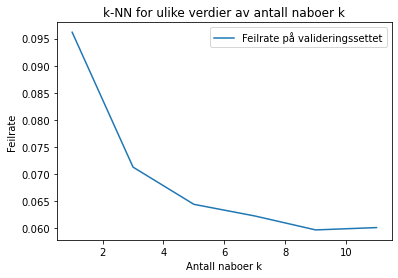

Valideringsfeilrate:
[[ 1.          0.09617862]
 [ 3.          0.07127523]
 [ 5.          0.06440532]
 [ 7.          0.06225848]
 [ 9.          0.05968227]
 [11.          0.06011164]]


In [64]:
knaboer = np.arange(1,12,step=2)
val_feilrate = np.empty(len(knaboer))


for i,k in enumerate(knaboer):
    
#Initialiser kNN med  k neighbors
    knn = KNeighborsClassifier(n_neighbors=k,p=2) # p=2 gir euklidsk avstand

# Tilpass modellen med treningssettet
    knn.fit(X_tren, df_tren['Purchase'])
    
# Beregn feilrate på valideringssett
# Score er accuracy= "andel korrekt"
    val_feilrate[i] = 1-knn.score(X_val, df_val['Purchase'])
    
# Lage plott
plt.title('k-NN for ulike verdier av antall naboer k')
plt.plot(knaboer, val_feilrate, label='Feilrate på valideringssettet')
plt.legend()
plt.xlabel('Antall naboer k')
plt.ylabel('Feilrate')
plt.show()

valres=np.vstack((knaboer, val_feilrate))
print("Valideringsfeilrate:")
print(valres.T)

### Problem 2h) (2P)

(i)  Velg $k$ med den minste feilraten og beregn forvirringsmatrise for valideringssettet (bruke samme code some for $k=1$ oppover).

(ii)  Er det lurt å bruke denne $k$-verdien? Hvorfor (ikke)?
 
###   <font color='red'>Løsning:</font>

# Oppgave 3: Klyngeanalyse (10 poeng)


### Oppgaven inneholder følgende elementer:
* Last inn et datasett og undersøk innholdet.  
* Bruk $K$-gjennomsnitt-klyngeanalyse får å finne klynger i bilder av håndskrevne tall (0-9). 
* Diskuter resultatene av klyngeanalysen..
* Diskutere $K$-gjennomsnitt-klyngeanalyse vs. hierarkisk klynganalyse
* Kommenter resultatene fra en hierarkisk klyngeanalyse.

## Finn klynger (struktur) i bildene av håndskrevne tall

Et stort felt innom maskinlæring er bildegjenkjenning (image recognition) og klassifisering. Dette betyr at vi vil laste inn et bilde til en statistisk algoritme, og får tilbake en etikett som beskriver hva bildet representerer, for eksempel en person, et tall, en sykdom,...

I dette eksempelet skal vi jobbe med data fra *mnist* (Modified National Institure of Standards and Technology) databasen, som for eksempel finnes her: https://www.kaggle.com/c/digit-recognizer. Datasettet inneholder digitaliserte bilder av handskrevne siffer (0-9), og dette pleier å bli brukt for å trene maskinlæringalgoritmer for klassifisering (det betyr at du vil forutsi hvilket tall et bestemt bilde inneholder, slik at datamaskinen kan lese tall, for eksempel postnummer på et brev). 

Her bruker vi dette datasettet til noe annet: Vi vil undersøke om vi finner struktur i bildene ved bruk av en klyngeanalyse. Vi vil jo kanskje håpe at de samme sifrene kommer til å bli gruppert i en klynge fordi de inneholder lignende mønstre. Her skal vi se om det er sant. 

Vi har lært om to populære algoritmer som brukes til å lage klynger av objekter: 

   * $K$-gjennomsnitt ($K$-means) algoritmen: Målet med denne algoritmen er å plassere de individuelle observasjonene i $K$ grupper (kalt klynger) basert på observasjonenes avstand til grupper av andre observasjoner. Algoritmen kjøres iterativt, og stoppes når at alle observasjoner som ligner hverandre er plassert i en gruppe (klynge) sammen.
   * Hierarkisk klyngeanalyse (se nedenfor).
  


In [65]:
# importere pakker og funksjoner vi trenger i oppgave 3
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans  # k-gjennomsnitt klyngeanalyse

from scipy.cluster.hierarchy import dendrogram, linkage

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

## Les inn datasettet

Vi begynner med å lese inn datasettet som inneholder informasjon om digitaliserte handskrevne siffer. Hvert siffer finnes i en firkant med $28\cdot 28$ = 784 pixler, og dermed er hvert bilde representert som en vektor med lengde 784.


In [66]:
## Les inn datasettet og se på de første 5 eksempler

images = pd.read_csv('https://www.math.ntnu.no/emner/IST100x/ISTx1003/images.csv', sep = ",", index_col = 0)

images.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V775,V776,V777,V778,V779,V780,V781,V782,V783,V784
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Å skrive ut headeren gir ingenting interessant: pikslene for disse bildene er gitt som et tall mellom 0 og 255 (gråskala), hvor 0 representerer helt svart og 255 representerer helt hvitt. Pikslene representert ovenfor er det øverste venstre hjørnet av bildet, og det nedre høyre hjørnet av bildet, som vi forventer ville være tomt (svart, og derfor 0). 

Vi ønsker å standardisere disse tallene slik at de er mellom 0.0 og 1.0 før analysen utføres.

In [67]:
## Standardisering av pikselne

images = images/255

Utskrift av tilleggsinformasjon om strukturen og objektene til datasettet gir:


In [68]:
# hvilken type er bildet vårt
print("Bildet har type", type(images))

# bildet er en numpytabell. Hva er formatet?
print("Formatet til tabellen er", images.shape)

#Average colour in image 50
print("Gjennomsnittsfarge i bilde er", images.iloc[49].mean())

print('Dataformatet til en piksel er', type(images.iloc[1,1]))


Bildet har type <class 'pandas.core.frame.DataFrame'>
Formatet til tabellen er (60000, 784)
Gjennomsnittsfarge i bilde er 0.16487595038015201
Dataformatet til en piksel er <class 'numpy.float64'>


Og så skal vi se hvordan de første 10 bildene i datasettet ser ut: 

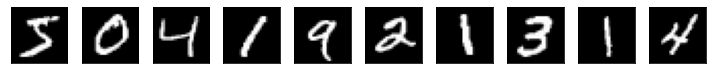

In [14]:
features = np.array(images)
features = features.reshape(features.shape[0], 28,28)

fig = plt.figure(figsize=(10,10))

for i in range(10):
    fig.add_subplot(1, 10, i+1)
    
    plt.imshow(features[i], cmap = 'gray')
    
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    

Det er ganske enkelt for oss mennesker å gjenkjenne disse individuelle sifferene -- selv om håndskrift kan være ganske uleselig. Nå vil vi se hvor bra K-gjennomsnittsalgoritmen finner struktur i disse dataene.

### Problem 3a) (2P)

  (i) Hvor mange bilder har vi i datasettet?  

  (ii) Hvilket siffer ligner det 50. bildet i datasettet vårt på? Lag et plott som viser dette sifferet. (Husk at Python begynner nummereringen med 0, og derfor refereres det 50. bildet til [49])

 
###   <font color='red'>Løsning:</font>

## Klyngeanalyse med $K$-gjennomsnitt

La oss nå endelig utføre $K$-gjennomsnittalgoritme. Vi må gå gjennom følgende steg:

  1. Angi antall klynger du ønsker
  2. Initialiser $K$-gjennomsnitt-modellen
  3. Tilpass $K$-gjennomsnitt-modellen

Vi bruker 𝐾-gjennomsnittsfunksjonen med $K=10$ (se kode under), fordi vi håper jo å finne igjen de 10 sifferene (0-9) i klyngene.

I tillegg kan vi få tilgang til sentroidene i klyngene våre i tabellen `means.cluster_centers_`, og plotte dem for å se hvordan algoritmen mener de typiske bildene i de 10 gruppene ser ut.


Hint: Her kan du lese litt mer om KMeans-funksjonen: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [25]:
# kodechunk kmeans

# Steg 1: Antall klynger
antall_klynger = 10

# Steg 2: Initaliser k-means algoritmen
kmeans = KMeans(n_clusters = antall_klynger, random_state = 1)

# Steg 3: Tilpass modellen
kmeans.fit(images)


#predclusters = kmeans.labels_

# sentroidene (a)
sentroider = kmeans.cluster_centers_

### Problem 3b) (3P)


 (i) Tegn sentroidene av de 10 klyngene fra $K$-gjennomsnitt modellen. Tilpass koden oppover (ovenfor problem 3a).
 
 (ii) Synes du at grupperingen i klynger er relevant og nyttig? Forklar. Maks 3 setninger. 

 (iii) Vi har valgt $K=10$ for dette eksempelet fordi vi hadde håpet å finne klynger som representerer de 10 sifferene 0-9. Men generelt er $K$ vilkårlig. Kom opp med en forslåg for hvordan man kan best velge $K$. (Se her, for eksempel: https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Beskriv i egne ord med maks 3 setninger! 
 
###   <font color='red'>Løsning:</font>

## Hierarkisk klyngeanalyse

Vi fortsetter nå med å bruke hierarkisk klyngeanalyse for *mnist* datasettet. Vi gjør *Agglomerative Clustering* ved bruk av `sklearn.cluster` pakken. (Agglomerative Clustering er noe vi har lært om i undervisningen, men se også her hvis du har lyst til å vite mer: https://en.wikipedia.org/wiki/Hierarchical_clustering)

 
Fordi hierarkisk gruppering er tregt for store datasett, og særlig for grafiske data, ble et tilfeldig utvalg på 20 bilder valgt fra det originale datasettet for å bruke denne modellen for illustrasjon.


### Problem 3c (4P):
 
(i) Beskriv hierarkisk klngeanalyse og sammenlign med $K$-gjennomsnitt algoritmen (hva er likt, hva er forskjellig, fordel og/eller ulempe med hierarkisk klyngeanalyse). Maks 3 setninger! 

(ii) Vurder dendrogrammet nedenfor. Synes du at den hierarkiske gruppering-algoritmen har laget gode/meningfulle grupper av bildene?  

(iii) I koden under har vi brukt gjeonnomsnittskobling (`method = 'average'`). Hvordan fungerer gjeonnomsnittskobling? Maks 2 setninger! 

(iv) Velg en annen måte å koble klyngene sammen (vi har lært om dette i undervisningen) og lag et nytt dendogram ved å tilpasse koden nedenfor. Kommenter resultatene. Ser det bedre/verre ut?

###   <font color='red'>Løsning:</font>

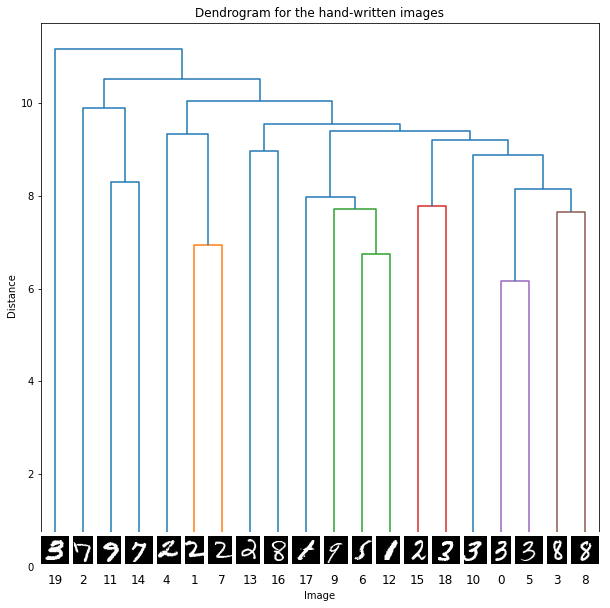

In [69]:
##Cluster

n_image = 20

sample = images.sample(n = n_image, random_state = 1)

sampleimg = np.array(sample).reshape(sample.shape[0], 28,28)

plt.figure(figsize=(10,10))
ax = plt.subplot()

# Bruk gjennomsnittskobling (method='average')
link = linkage(y = sample, method = 'average', metric = 'euclidean')

dendro = dendrogram(link)

dcoord = np.array(dendro["dcoord"])
icoord = np.array(dendro["icoord"])
leaves = np.array(dendro["leaves"])

idx = np.argsort(dcoord[:, 2])

dcoord = dcoord[idx, :]
icoord = icoord[idx, :]

idx = np.argsort(link[:, :2].ravel())
label_pos = icoord[:, 1:3].ravel()[idx][:n_image]

for i in range(n_image):
    imagebox = OffsetImage(sampleimg[i], cmap = 'gray', interpolation = "bilinear")
    ab = AnnotationBbox(imagebox, (label_pos[i], 0),  box_alignment=(0.5, -0.1), 
                        bboxprops={"edgecolor" : "none"})
    ax.add_artist(ab)

plt.title('Dendrogram for the hand-written images')
plt.xlabel('Image')
plt.ylabel('Distance')
plt.show()


### Problem 3d) (1P)

 
Med tanke på at verken de 10 klyngene funnet med $K$-gjennomsnittsalgoritmen, eller med hierarkisk klyngeanalyse, ser ut til å representere de 10 sifferene 0-9 veldig godt, tror du at klyngeanalyse (som er en ikke-veiledet metode) var en god metode for å bruke her? Hvilke andre metode vil du anbefale når målet er å klassifisere (predikere) siffer fra et håndskrevet tall?

###   <font color='red'>Løsning:</font>